Airline Passengers Data
---

In this exercise, you will use Airline Passengers dataset, which provides the monthly number of airline passengers from 1949 to 1960 for an airline company. 

1. Load the data from the file `c2_AirPassengers.csv` into a dataframe:
- Use the Month column as the index when you load the data.
- Check the shape of the data. 
- Are all years and months from 1949 to 1960 present in the data?

In [144]:
import pandas as pd
import numpy as np

df = pd.read_csv('resources/c2_AirPassengers.csv')
df.set_index('Month', inplace=True)
df.columns = ["Passengers"]

df.index = pd.to_datetime(df.index)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [145]:
assert len(df) == (1960 - 1949 + 1) * 12 # check if all months are present
df.shape

(144, 1)

__Answers__:
- Yes, all months are present


2\. Do the following steps:
- Create new columns Month and Year using the index of the dataframe.
- Group the Passengers column by the Year and provide summary statistics of the number of passengers.
- Discuss the patterns.

In [146]:
df['Month'] = df.index.month
df['Year'] = df.index.year

df.groupby('Year')['Passengers'].describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1949,12,126,13,104,118,125,135,148
1950,12,139,19,114,125,137,151,170
1951,12,170,18,145,159,169,179,199
1952,12,197,22,171,180,192,211,242
1953,12,225,28,180,199,232,238,272
1954,12,238,34,188,221,231,260,302
1955,12,284,42,233,260,272,312,364
1956,12,328,47,271,300,315,359,413
1957,12,368,57,301,330,351,408,467


__Answers__:
- Number of passengers have an clear uptrend since 1949 with every year having more passengers as the previous year

3\. Finding trends and cycles in the data using visualisations:

- Do you observe a trend in the data over time?
- Is there a seasonal component present in the data? if yes, describe it and explain if it has changed over time.

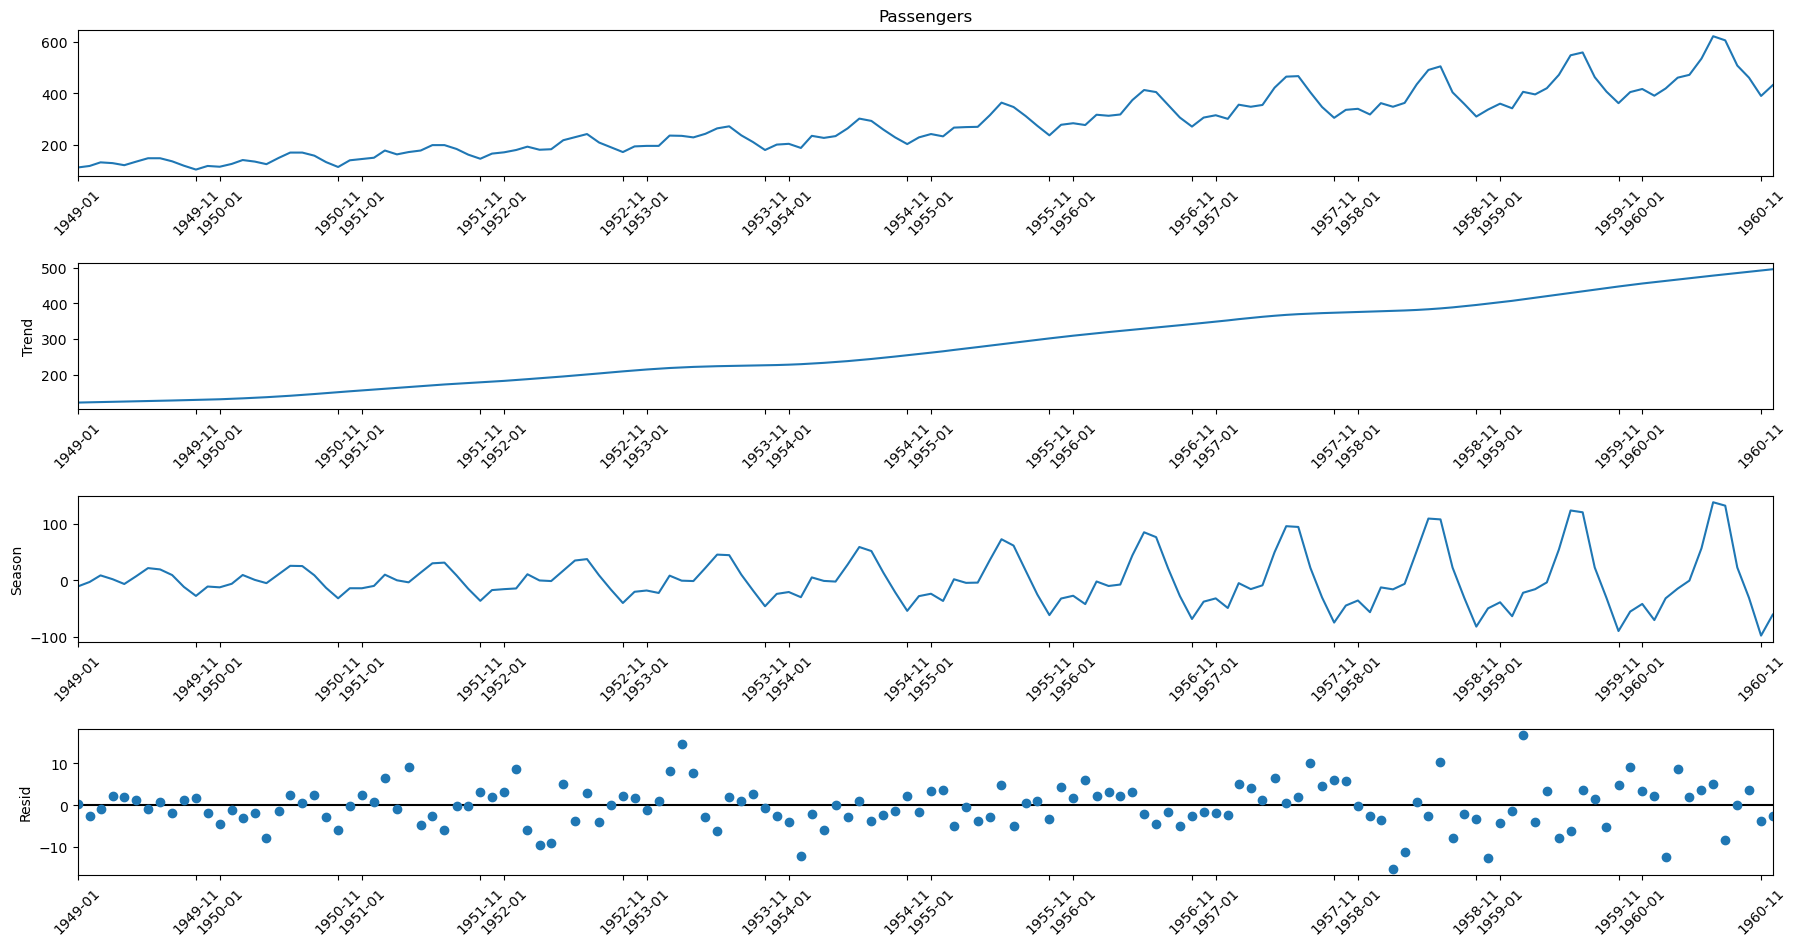

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from statsmodels.tsa.seasonal import STL

y_t = df["Passengers"]
# decomposition
res = STL(df["Passengers"]).fit()
fig = res.plot()

fig.set_size_inches(20, 10)

quarterly_ticks = [date.strftime('%Y-%m') for date in df.index if date.month == 1 or date.month == 11]

for ax in fig.axes:
    ax.set_xticks(quarterly_ticks)
    ax.set_xticklabels(quarterly_ticks, rotation=45)
plt.show()

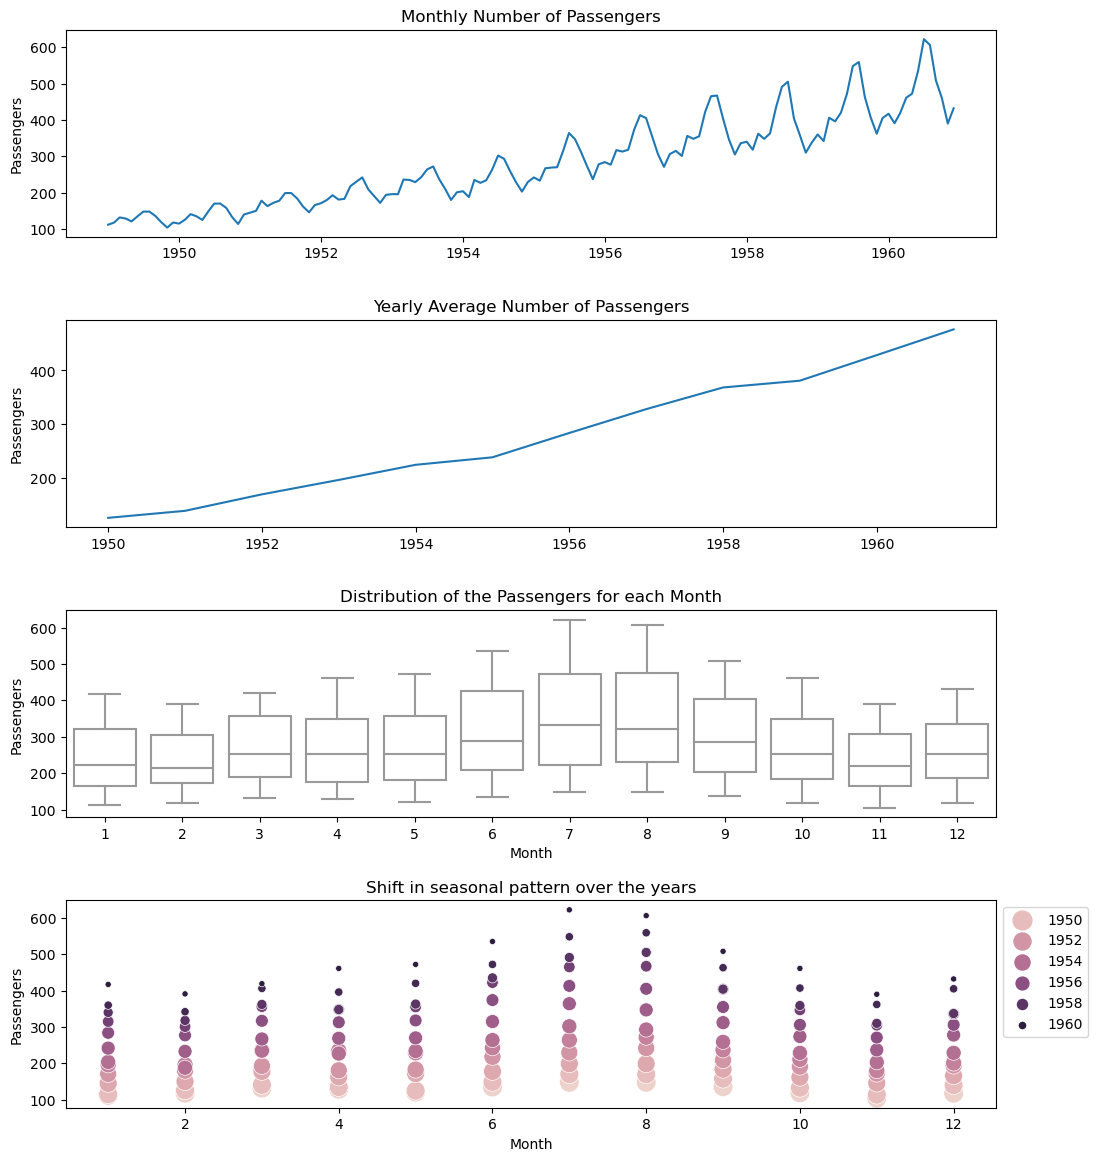

In [148]:
# plotting trend and seasonality
fig, axes = plt.subplots(4, 1, figsize=(12, 14), gridspec_kw={"hspace": 0.4})
axes[0].plot(df["Passengers"])
axes[0].set_title("Monthly Number of Passengers")
axes[0].set_ylabel("Passengers")

axes[1].plot(df["Passengers"].resample("A").mean())
axes[1].set_title("Yearly Average Number of Passengers")
axes[1].set_ylabel("Passengers")

sns.boxplot(data=df, x="Month", y="Passengers", color="white", ax=axes[2])
axes[2].set_title("Distribution of the Passengers for each Month")

sns.scatterplot(
    data=df, x="Month", y="Passengers", hue="Year", size="Year", sizes=(200, 20)
)
axes[3].set_title("Shift in seasonal pattern over the years")
axes[3].legend(bbox_to_anchor=(1, 1))

plt.show()

__Answers__:
- The trend is clearly up
- The seasonality is clearly present, with the variance increasing over time. Usually passenger numbers rise during the year and sharply drop off after July and reaching the season low in November.


4. Find out autocorrelations in the data. 

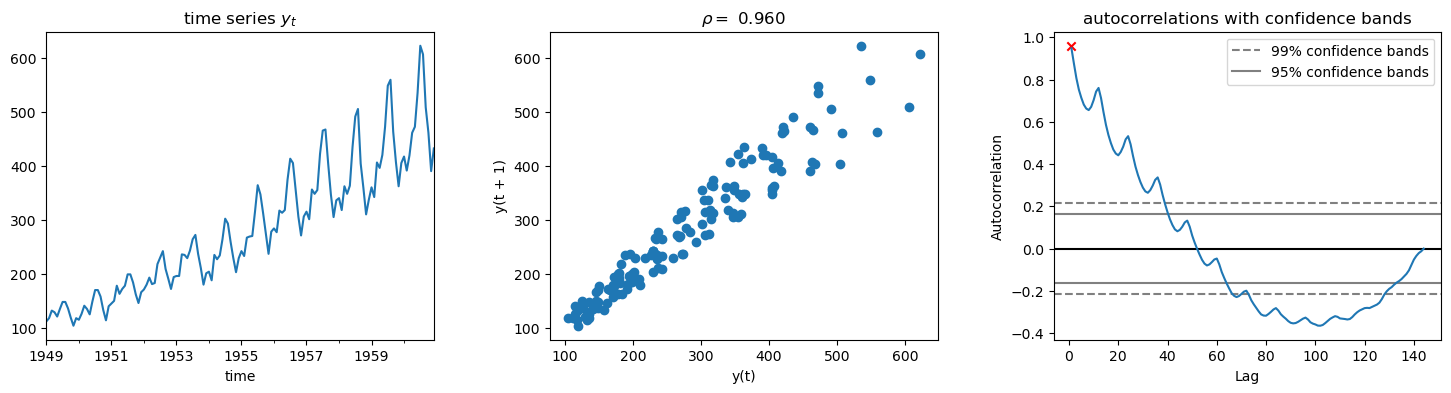

In [149]:
from pandas.plotting import autocorrelation_plot, lag_plot

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4), gridspec_kw={"wspace": 0.3})

y_t.plot(ax=axes[0])
axes[0].set_title("time series $y_{t}$")
axes[0].set_xlabel("time")

lag_plot(y_t, ax=axes[1])
axes[1].set_title(r"$\rho = $ {:.3f}".format(y_t.autocorr(1)))

autocorrelation_plot(y_t, ax=axes[2])
axes[2].set_title("autocorrelations with confidence bands")
axes[2].grid()
axes[2].scatter(1, y_t.autocorr(1), marker="x", c="red")
axes[2].legend(["99% confidence bands", "95% confidence bands"])

plt.show()

__Answers__:
- The data seems to be strongly autocorrelated. The autocorrelation seems also to be impacted by the seasonality and the autocorrelation seems strongest when the lag is a multiple of 12. The autocorrelation seems to stop being relevant after lag 35.

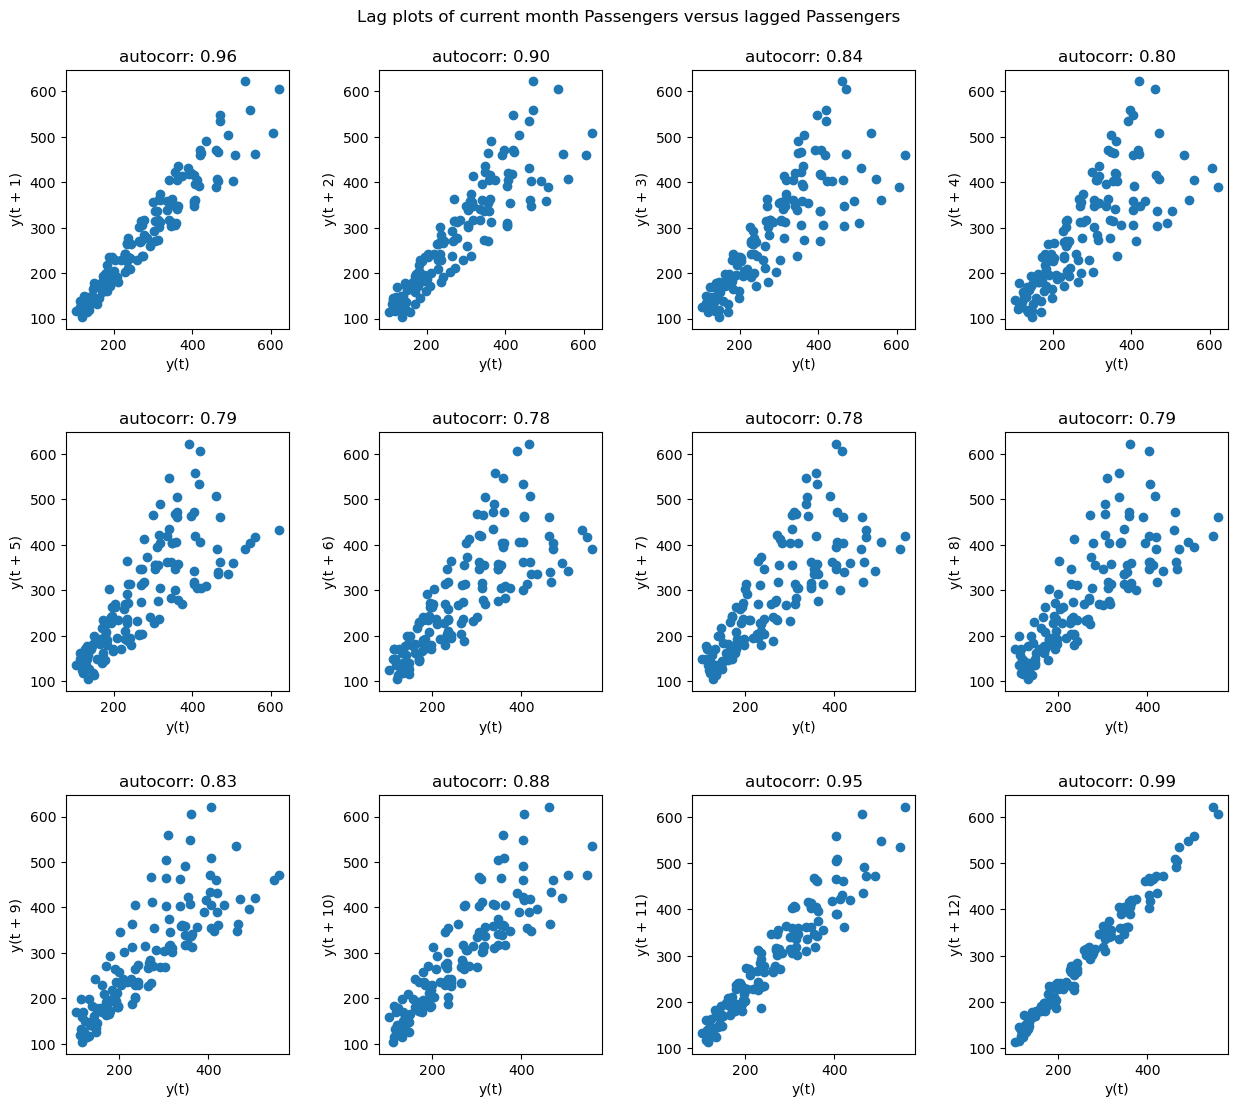

In [150]:
fig, axes = plt.subplots(
    nrows=3, ncols=4, figsize=(15, 12), gridspec_kw={"hspace": 0.4, "wspace": 0.4}
)
fig.suptitle("Lag plots of current month Passengers versus lagged Passengers")

for (ax, lag) in zip(axes.flatten(), range(1, 13)):

    lag_plot(df["Passengers"], lag=lag, ax=ax)
    ax.set_title("autocorr: {:.2f}".format(df["Passengers"].autocorr(lag)))

fig.subplots_adjust(top=0.93)

plt.show()

5\. Find out if data are stationary and try to remove non-stationarity if there is evidence supporting its presence.

In [151]:
from statsmodels.tsa.stattools import adfuller, kpss

adf_test = adfuller(y_t)
print("ADF p-value is %.2f" % adf_test[1])

kpss_test = kpss(y_t, regression="ct", nlags="auto")
print("KPSS p-value is %.2f" % kpss_test[1])

ADF p-value is 0.99
KPSS p-value is 0.10


/Users/mjunker/Programming/softwarecatering/cos_applied_ml/miniconda3/envs/adsml/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


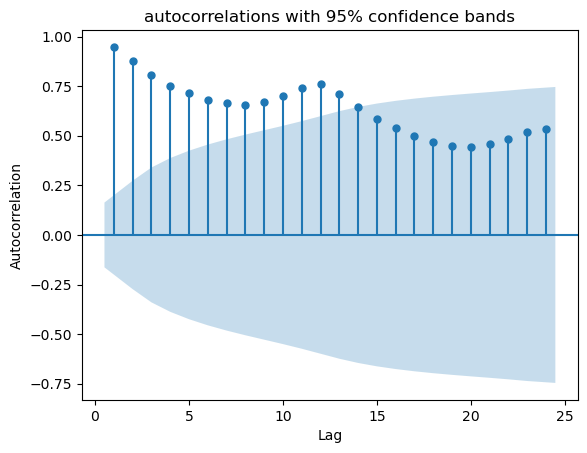

In [152]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df["Passengers"], lags=24, alpha=0.05, zero=False)

plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("autocorrelations with 95% confidence bands")

plt.show()

__Answers__:
- The data is clearly not stationary, as adf and kpss have a value of > 0.05

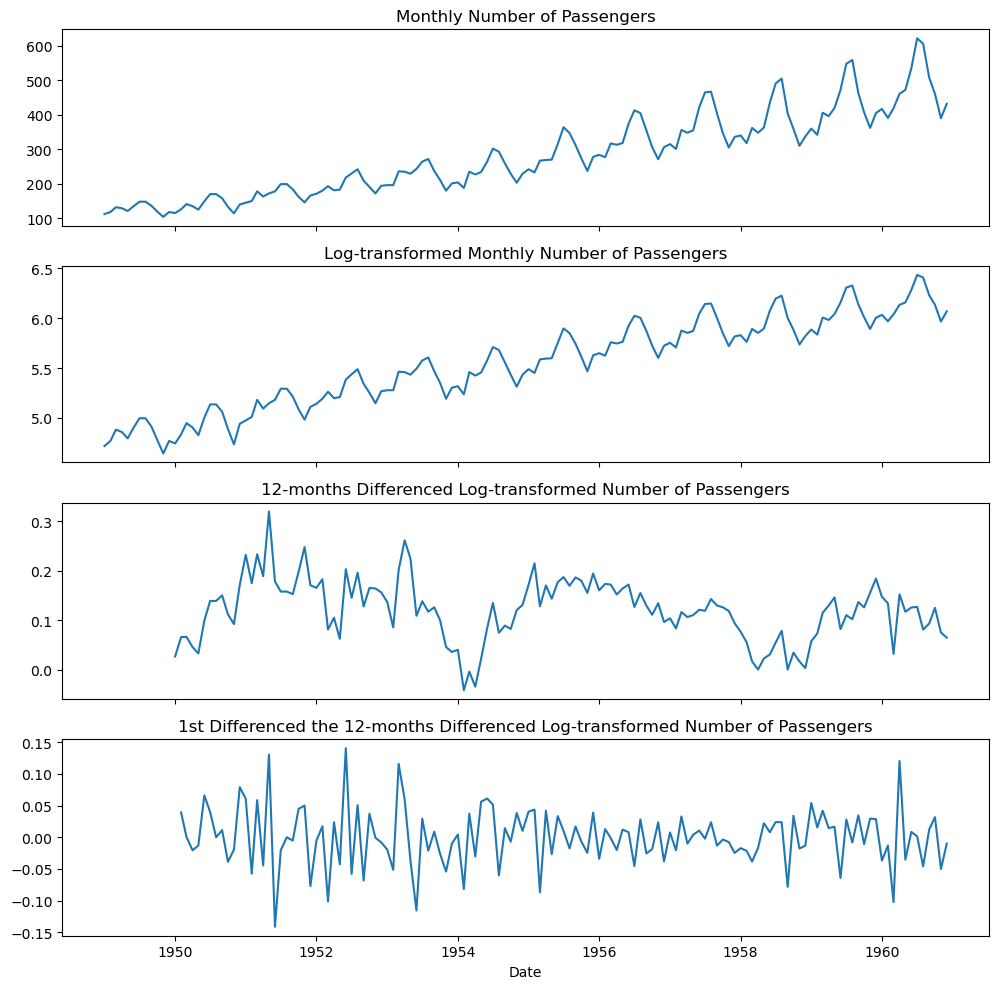

In [153]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10), sharex=True)

# create the plot for original data
ax[0].set_title("Monthly Number of Passengers")
ax[0].plot(df["Passengers"])

# create the plot for original data
ax[1].set_title("Log-transformed Monthly Number of Passengers")
ax[1].plot(np.log(df["Passengers"]))

# create the seasonaly differenced plot
ax[2].set_title("12-months Differenced Log-transformed Number of Passengers")
ax[2].plot(np.log(df["Passengers"]).diff(12))

# create the first differenced plot
ax[3].set_title(
    "1st Differenced the 12-months Differenced Log-transformed Number of Passengers"
)
ax[3].set_xlabel("Date")
ax[3].plot(np.log(df["Passengers"]).diff(12).diff(1))

fig.tight_layout()
plt.show()

In [154]:
from statsmodels.tsa.stattools import adfuller, kpss

adf_test = adfuller(np.log(y_t).diff(12).dropna())
print("ADF p-value is %.2f" % adf_test[1])

kpss_test = kpss(np.log(y_t).diff(12).dropna(), regression="ct", nlags="auto")
print("KPSS p-value is %.2f" % kpss_test[1])

ADF p-value is 0.07
KPSS p-value is 0.10


/Users/mjunker/Programming/softwarecatering/cos_applied_ml/miniconda3/envs/adsml/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
